In [25]:
import time
from IPython import display

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random
%matplotlib inline

# 1) Get data in a pandas.DataFrame and plot it using matplotlib.pyplot

In [3]:
# Get data
#  1) directement sous forme de list python

GPU = [2048,2048,4096,4096,3072,6144,6144,8192,8192,8192,8192,11264,11264]
prix = [139.96,149.95,184.96,194.95,299.95,332.95,359.95,459.95,534.95,569.95,699.95,829.96,929.95]
data = pd.DataFrame({'x1':GPU,'y':prix})

# Remarque: On peut également enregistrer des données structurées (dataFrame) en .csv
data.to_csv('graphicCardsData.csv',index=False)

#  2) En utilisant la fonction .read_csv() de pandas pour importer des données extérieure sous form .csv 
#     directement dans un pandas.DataFrame
data = pd.read_csv('data/graphicCards.csv')
data = data[['memory (Go)','price (euros)']].dropna()
data.columns = ['x1','y']
data.x1 = data.x1
data.head()

,x1,y
0,1.0,37.94
1,1.0,39.95
2,1.0,39.95
3,1.0,39.95
4,1.0,41.95


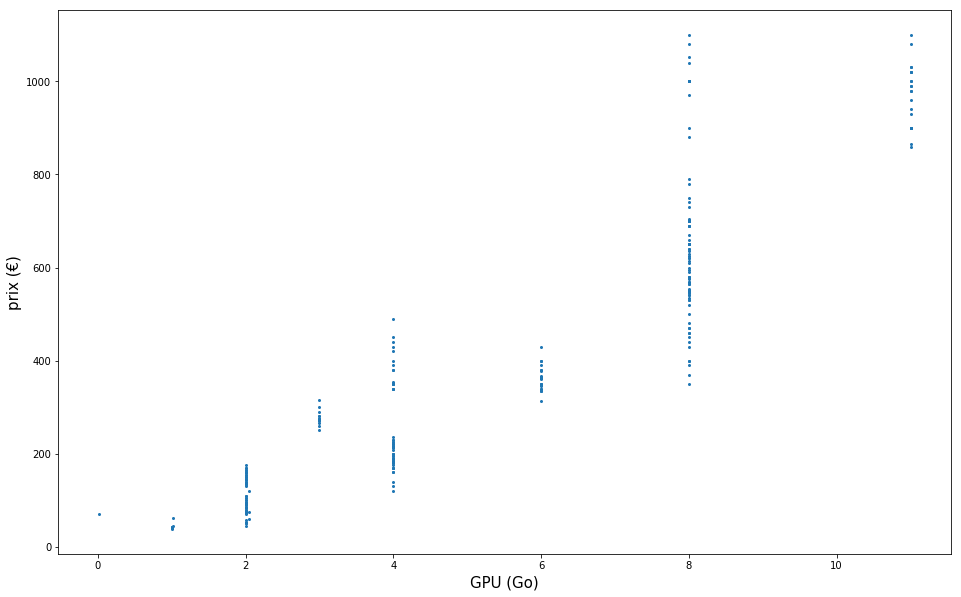

In [4]:
#PLot data
fig, ax = plt.subplots(figsize=(16,10))
plt.plot(data.x1,data.y,'o', ms=2)
plt.xlabel('GPU (Go)',fontsize=15)
plt.ylabel('prix (€)',fontsize=15)
plt.show();

# 2) Contruire un modéle pour nos données

In [5]:
# Définir notre hypothèse (fonction)

def hypothesis(x,theta):
    return np.dot(x,theta)

In [6]:
# On génère aléatoirement une valeur de départ pour le paramètre theta1 de notre modèle

theta = np.random.rand()

In [7]:
# Fonction pour générer la droite représentant notre modèle

def getHypothesisForPLot(theta):
    return pd.DataFrame({'x':np.arange(0, 12000, 100)/1000,
                         'y':[hypothesis(x,theta)/1000 for x in np.arange(0, 12000, 100)]})

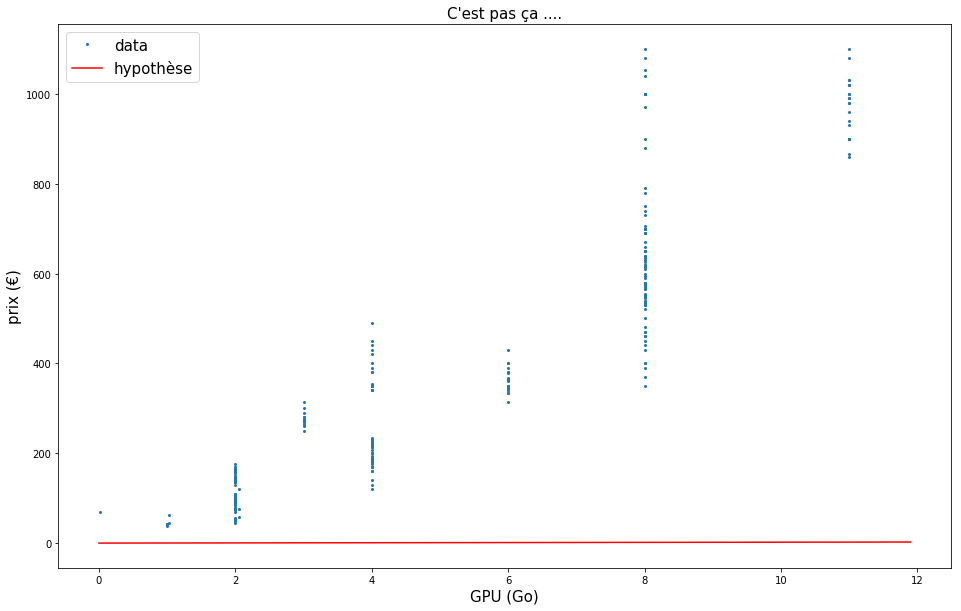

theta = 0.199356


In [8]:
# On plot les données avec notre hypothèse ...
fig, ax = plt.subplots(figsize=(16,10))
plt.plot(data.x1, data.y,'o',label='data',ms=2)
plt.plot(getHypothesisForPLot(theta).x,getHypothesisForPLot(theta).y ,'r',label='hypothèse')
plt.xlabel('GPU (Go)',fontsize=15)
plt.ylabel('prix (€)',fontsize=15)
plt.title("C'est pas ça ....",fontsize=15)
plt.legend(fontsize=15)
plt.show();

print("theta = %f" % theta)

# 3) Tester la pertinence de notre modèle: la fonction de coût

In [9]:
# On définit notre fonction de coût: somme quadratique (eg: on somme les carré)

def costFunction(y,yhat):
    return np.square(yhat - y).sum()/(2*y.shape[0])

In [10]:
# Prix prédis par notre modèle (avec un theta choisi pour illustrer) pour chaque exemple

theta = 80
costFctData = data.iloc[np.random.randint(0,data.shape[0],10)]
costFctData.index = np.arange(10)
yhat = hypothesis(costFctData.x1,theta)

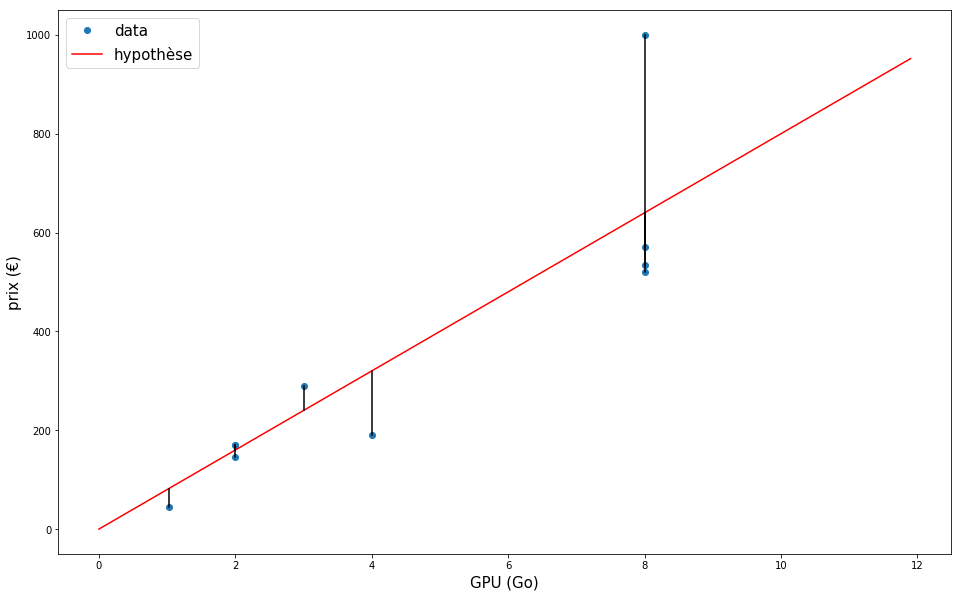

theta = 80.000000
J(theta) = 9055.960035


In [11]:
#Comment fonctionne la fonction de coût: on somme le carré de toute les barre noire
fit, ax = plt.subplots(figsize=(16,10))
plt.plot(costFctData.x1,costFctData.y,'o',label='data')
plt.plot(getHypothesisForPLot(theta).x,getHypothesisForPLot(theta).y,'r',label='hypothèse')
for i in range(costFctData.shape[0]):
    plt.plot((costFctData.x1[i],costFctData.x1[i]), (min(costFctData.y[i],yhat[i]),max(costFctData.y[i],yhat[i])), 'k-')
plt.xlabel('GPU (Go)',fontsize=15)
plt.ylabel('prix (€)',fontsize=15)
plt.legend(fontsize=15)
plt.show();

print("theta = %f" % theta)
print("J(theta) = %f" % costFunction(costFctData.y,yhat))

# 4) À quoi ressemble J(theta) en fonction de theta1

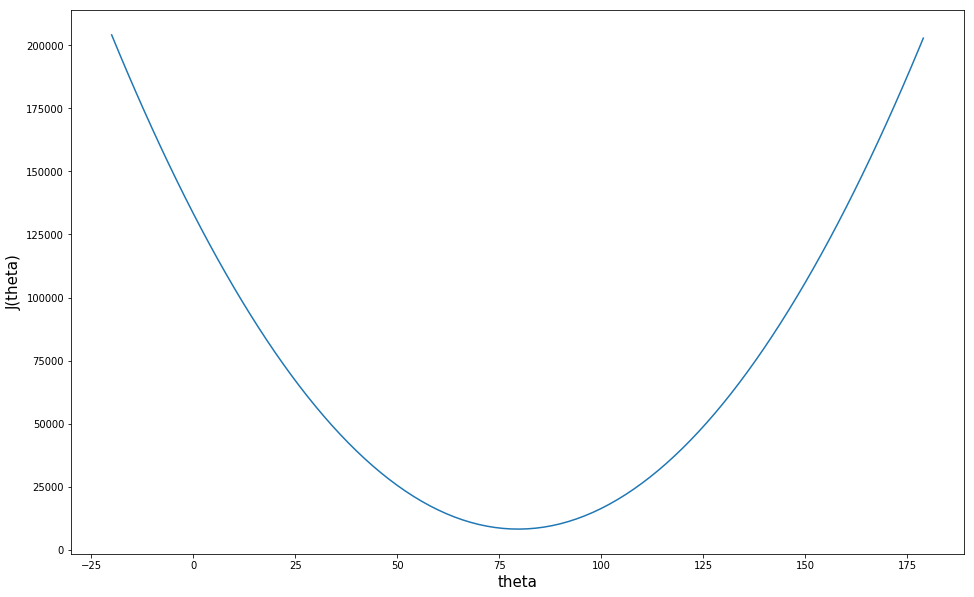

In [12]:
# Calculons (brutalement) la valeur de J(theta) dans un intervale de valeur de theta1 
#     pour observer la forme de notre fonction de coût que nous allons chercher à minimiser

thetaRange = np.arange(80-100,80+100,1)
costFctEvol = pd.DataFrame({'theta':thetaRange,
                            'cost':[costFunction(data.y,hypothesis(data.x1,theta)) 
                                    for theta in thetaRange]})

fit, ax = plt.subplots(figsize=(16,10))
plt.plot(costFctEvol.theta,costFctEvol.cost)
plt.xlabel('theta',fontSize=15)
plt.ylabel('J(theta)',fontSize=15)
plt.show();

# 5) La descente de Gradient

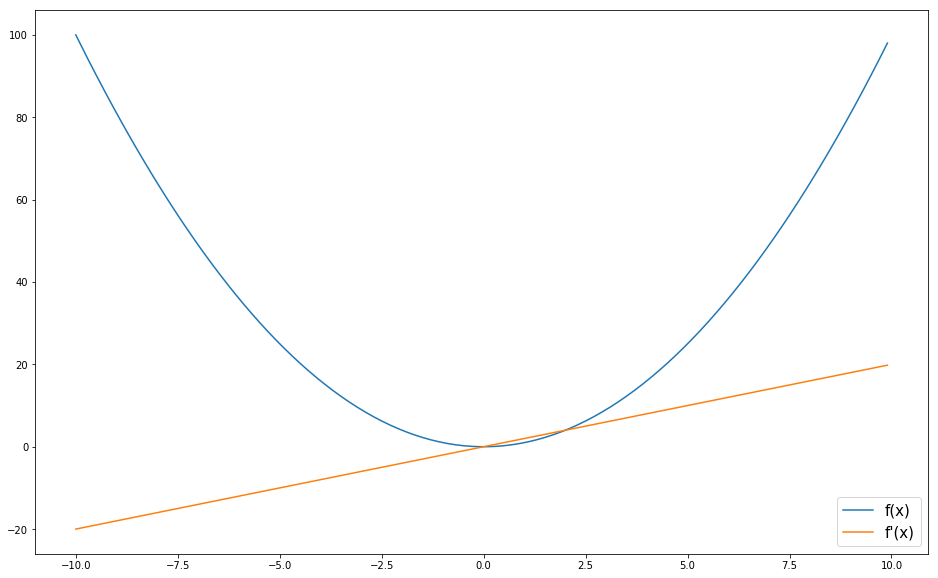

In [13]:
# La descente de gradient utilise la notion de dérivée, 
#      illustrée ici avec la fonction carré (qui doit nous en rappeler une autre!)

def fct(x):
    return np.power(x,2)

def fctDeriv(x):
    return 2*x

fctCarre = pd.DataFrame({'x':np.arange(-10,10,0.1),'y':[fct(x) for x in np.arange(-10,10,0.1)]})
fctCarreD = pd.DataFrame({'x':np.arange(-10,10,0.1),
                          'y':[fctDeriv(x) for x in np.arange(-10,10,0.1)]})
fit, ax = plt.subplots(figsize=(16,10))
plt.plot(fctCarre.x,fctCarre.y,label='f(x)')
plt.plot(fctCarreD.x,fctCarreD.y,label="f'(x)")
plt.legend(fontsize=15);

In [17]:
# La descente de gradient utilise la dérivé de la fonction de coût 
#    par rapport au paramètre theta1

def costFctDeriv(x,y,yhat):
    return ((yhat - y)*x.T).sum().sum()/y.shape[0]

In [18]:
# À chaque étape de la descente de gradient (jusqu'à la convergence), 
#   on incremente la valeur de theta1 par ce résultat.
#   Alpha est le learning rate

def gradDescent(x,y,yhat,alpha):
    return -alpha*costFctDeriv(x,y,yhat)

In [19]:
# on plot les données avec l'hypothèse correpondant à la valeur de theta 
#    ainsi que l'évolution dans la courbe de J(theta) en fonction de theta
# On rajoute également la valeur de J(theta) en fonction du temps qui va nous servir à 
#   débuger notre algorithme

def plotData(ax,x,y,theta,yhat,gradDescentEvol):
    ax.plot(x,y,'o',label='data')
    ax.plot(getHypothesisForPLot(theta).x,getHypothesisForPLot(theta).y,'r',label='hypothèse')
    for i in range(x.shape[0]):
        ax.plot((x[i],x[i]), (min(y[i],yhat[i]),max(y[i],yhat[i])), 'k-')
    ax.legend(fontsize=12)

def plotCostFunction(ax,x,y,theta,gradDescentEvol,thetaInit):
#    thetaRange = np.arange(abs(thetaInit)-100,abs(thetaInit)+100,0.1)
    thetaRange = np.arange(80-100,80+100,0.1)
    costFctEvol = pd.DataFrame({'theta':thetaRange,
                                'cost':[costFunction(y,hypothesis(x,genTheta))
                                        for genTheta in thetaRange]})

    ax.plot(costFctEvol.theta,costFctEvol.cost,label='J(theta)')
    for i in range(gradDescentEvol.shape[0]):
        ax.plot(gradDescentEvol.theta[i],gradDescentEvol.J[i],'ro')
    for i in range(gradDescentEvol.shape[0]-1):
        ax.plot((gradDescentEvol.theta[i],gradDescentEvol.theta[i+1]),
                (gradDescentEvol.J[i],gradDescentEvol.J[i+1]),'k-',lw=1)
    ax.legend(fontsize=12)

def plotCostFunctionEvol(ax,gradDescentEvol):
    ax.plot(np.arange(gradDescentEvol.shape[0]),gradDescentEvol.J,label='J(theta)')
    ax.legend(fontsize=12)

In [21]:
# Split train/test
index = data.index.values.copy()
random.shuffle(index)

X_train = data.x1.loc[index[:int(len(index)*0.7)]]
X_test = data.x1.loc[index[int(len(index)*0.7):]]
Y_train = data.y.loc[index[:int(len(index)*0.7)]]
Y_test = data.y.loc[index[int(len(index)*0.7):]]

X_train.index = np.arange(X_train.shape[0])
Y_train.index = np.arange(Y_train.shape[0])
X_test.index = np.arange(X_test.shape[0])
Y_test.index = np.arange(Y_test.shape[0])

print("Train set X shape: {}".format(X_train.shape))
print("Train set Y shape: {}".format(Y_train.shape))
print("Test set X shape: {}".format(X_test.shape))
print("Test set X shape: {}".format(Y_test.shape))

Train set X shape: (172,)
Train set Y shape: (172,)
Test set X shape: (74,)
Test set X shape: (74,)


In [27]:
# On utilise donc une valeur de départ pour theta généré aléatoirement entre 0 et 1, 
#    la valeur du learning rate est fixé à 0.00000003
# Epsilon correspond à la précision que l'on veut atteindre pour stopper la descente de gradient

thetaInit = np.random.rand()
yhat = hypothesis(X_train,thetaInit)
alpha = 0.045
epsilon = 0.0001

In [28]:
# On prepare un dataframe pour stocker les valeurs de J(theta) et theta1

gradDescentEvol = pd.DataFrame({'theta':thetaInit,
                                'J':costFunction(Y_train,yhat)},index = np.arange(1))

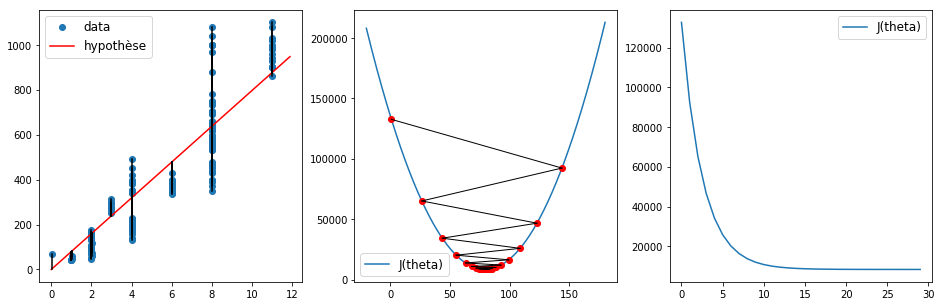

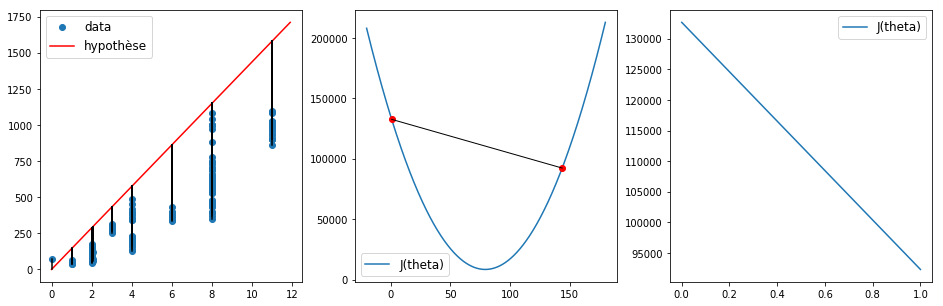

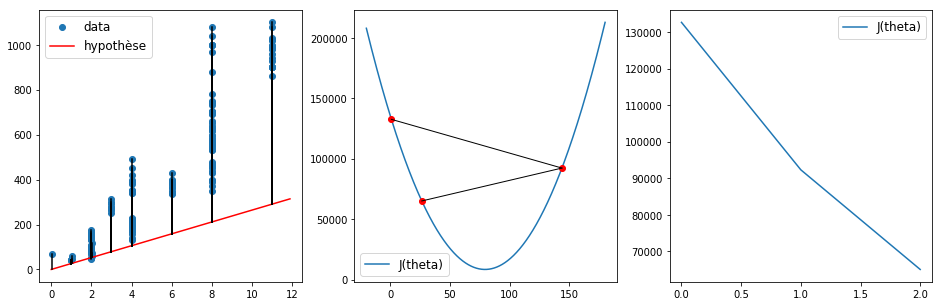

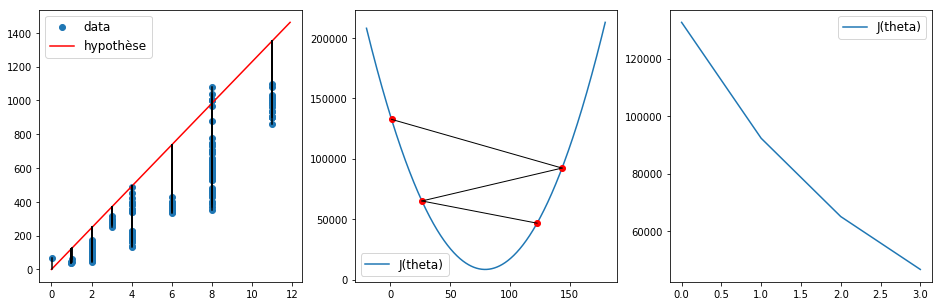

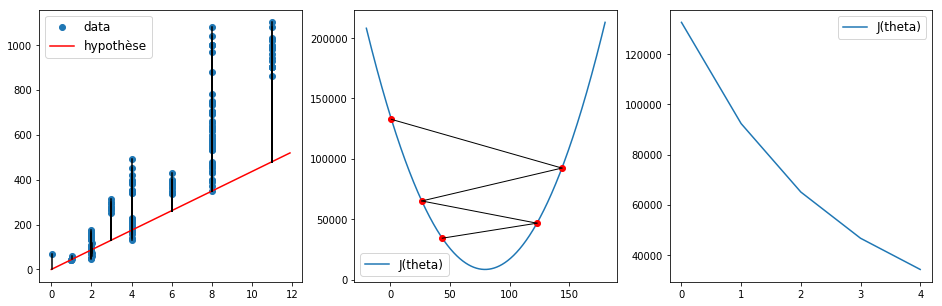

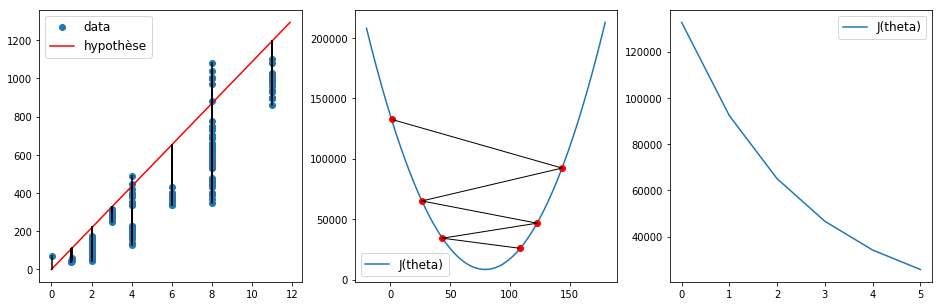

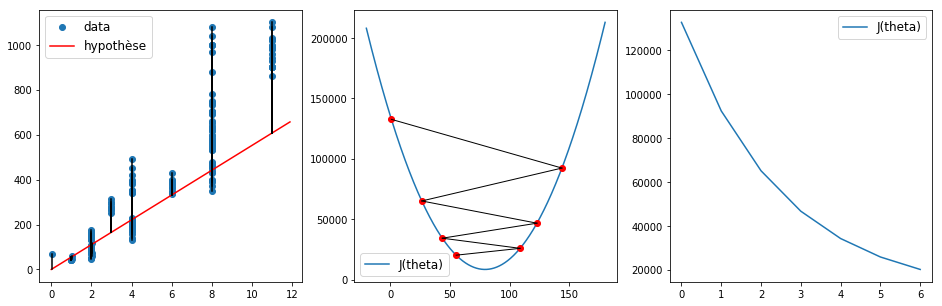

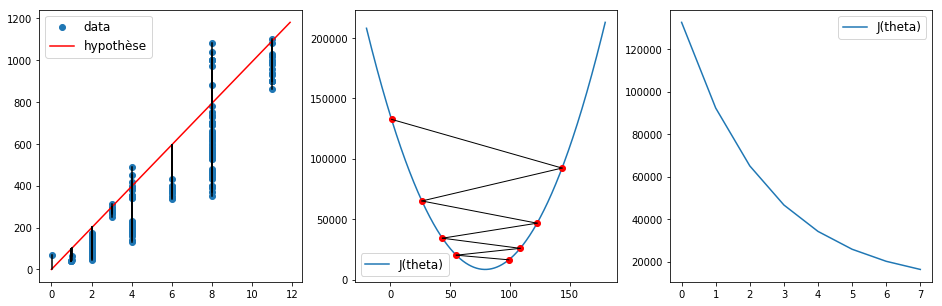

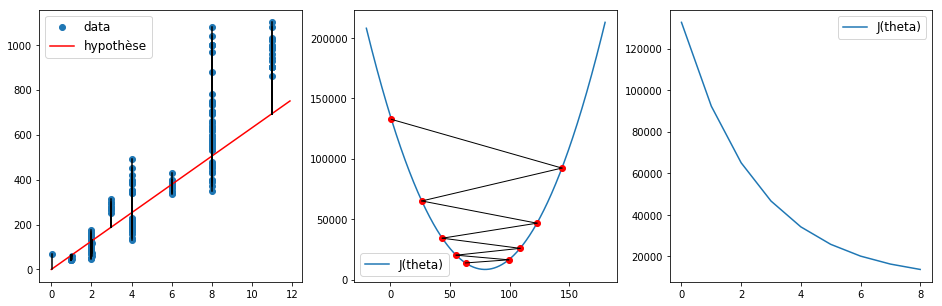

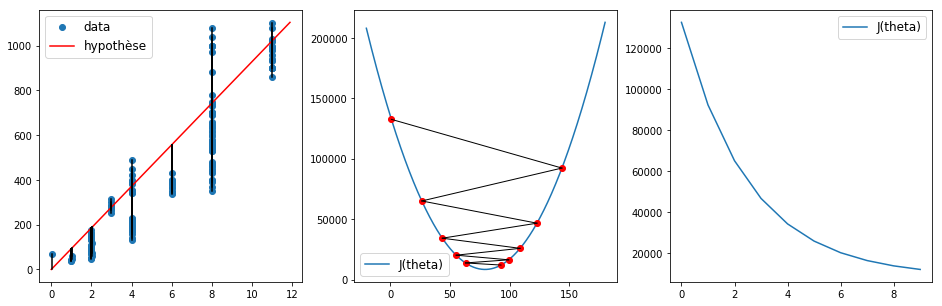

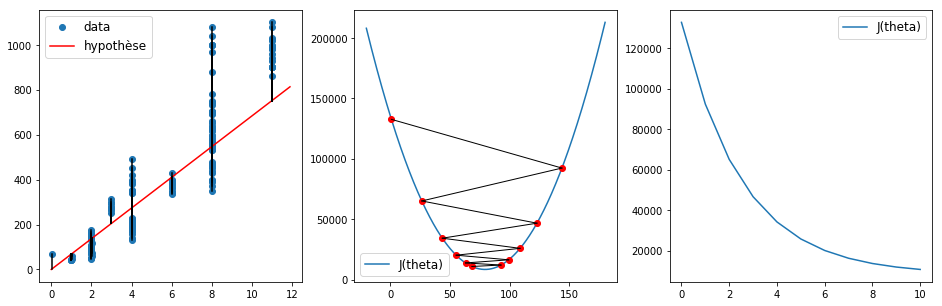

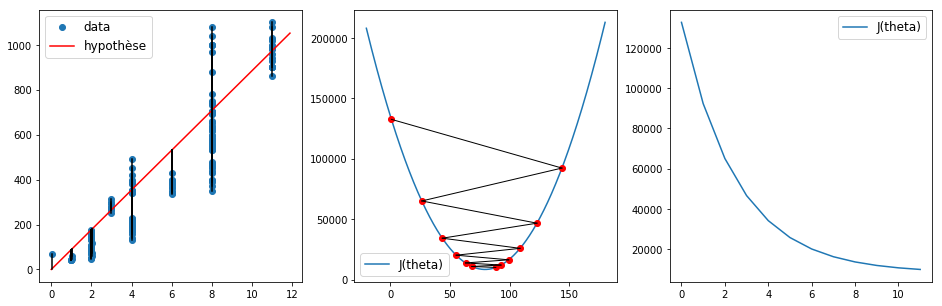

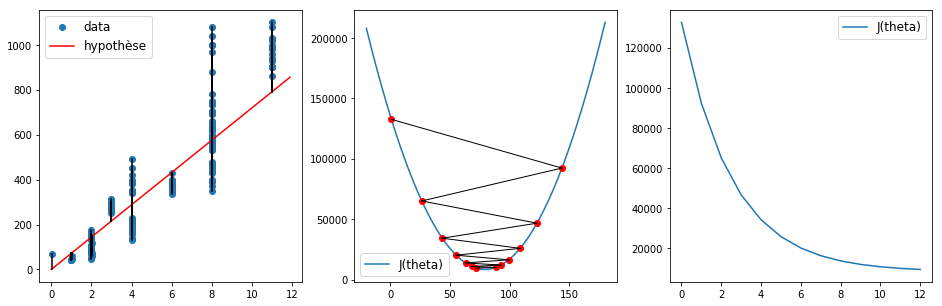

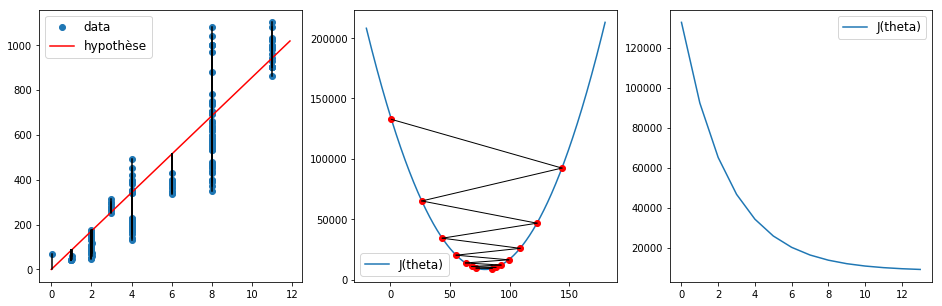

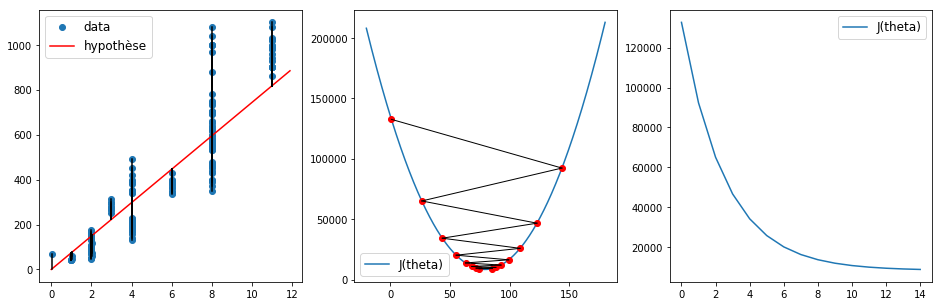

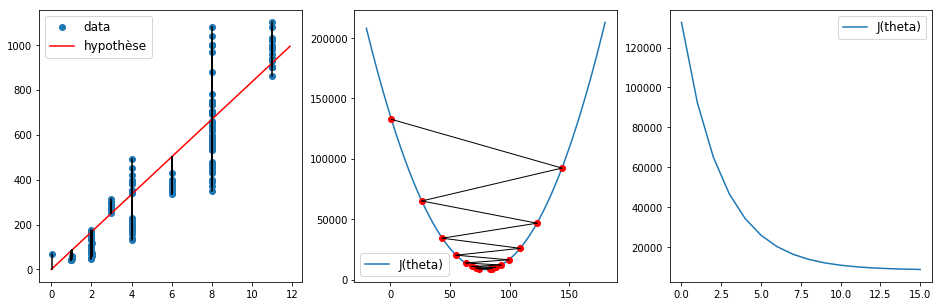

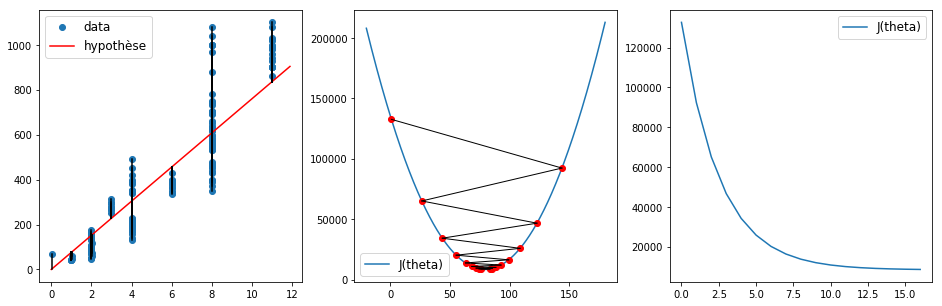

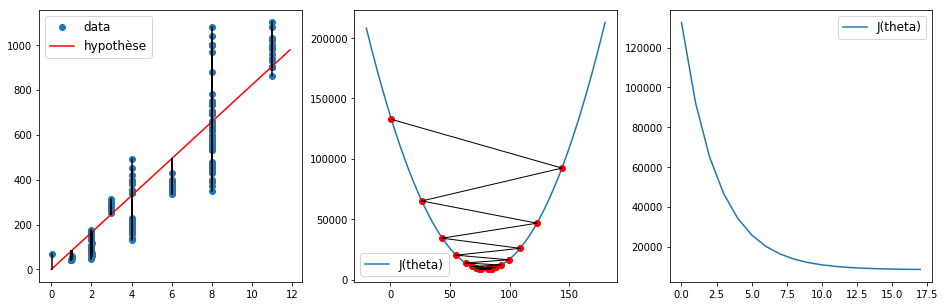

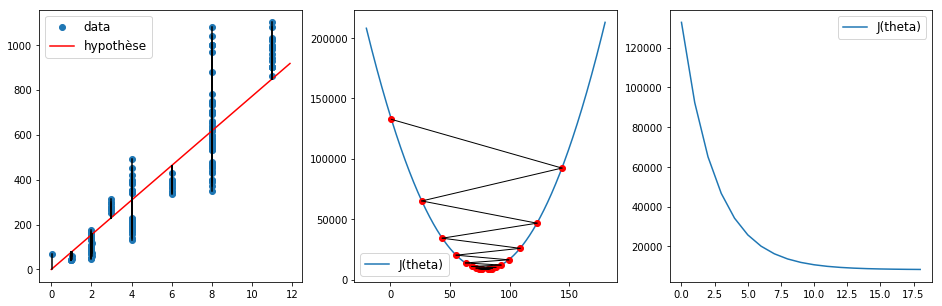

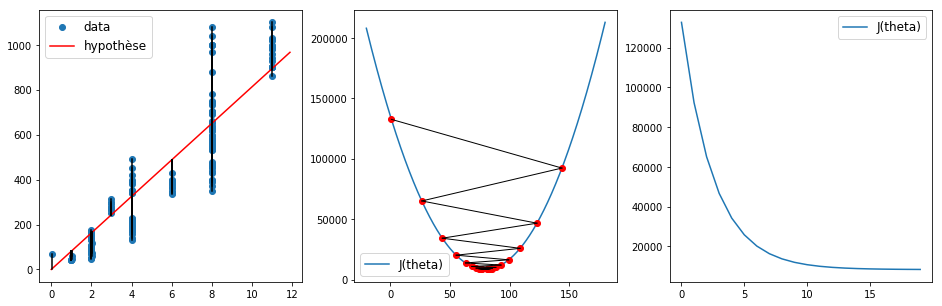

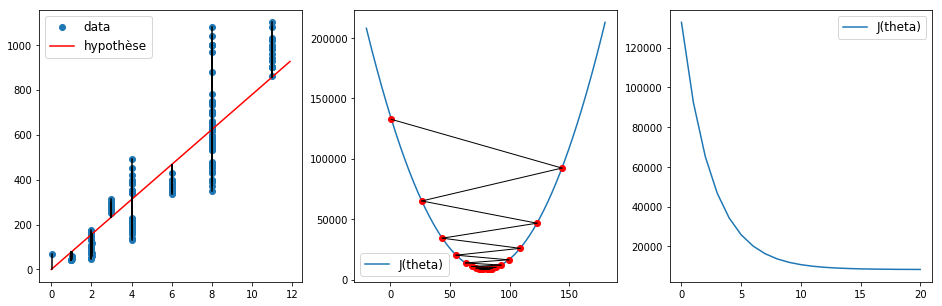

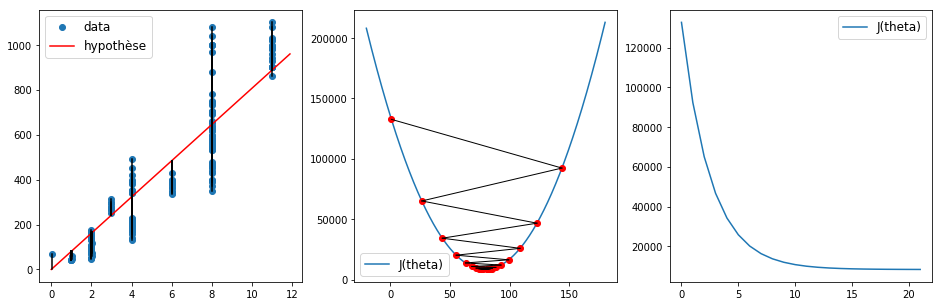

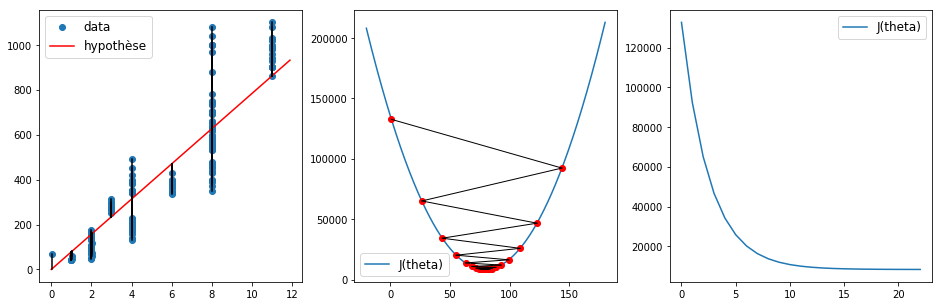

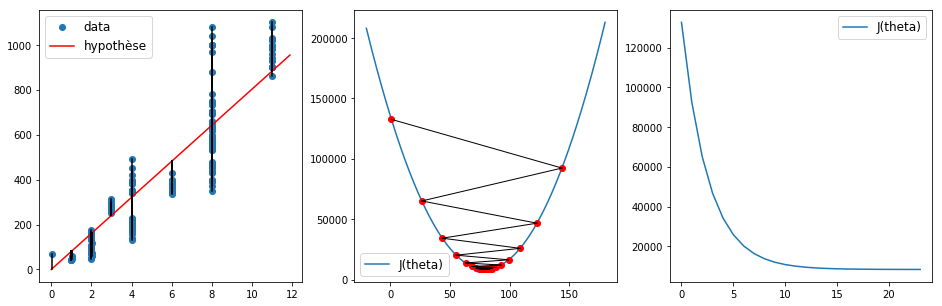

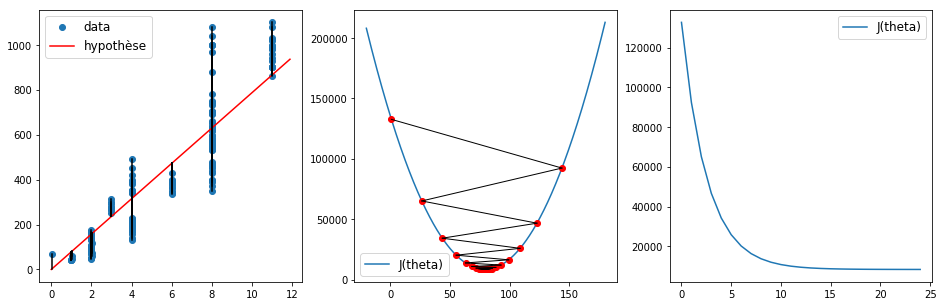

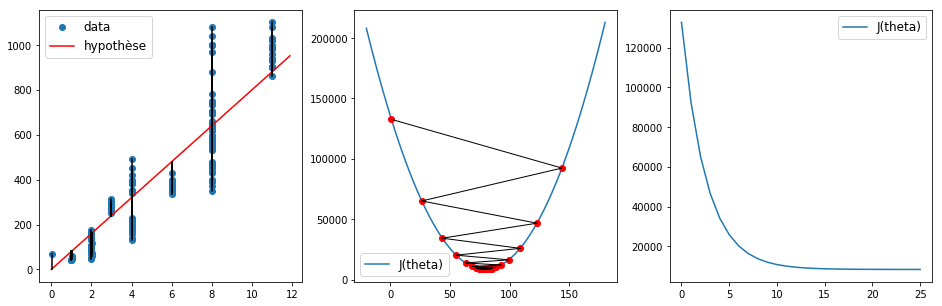

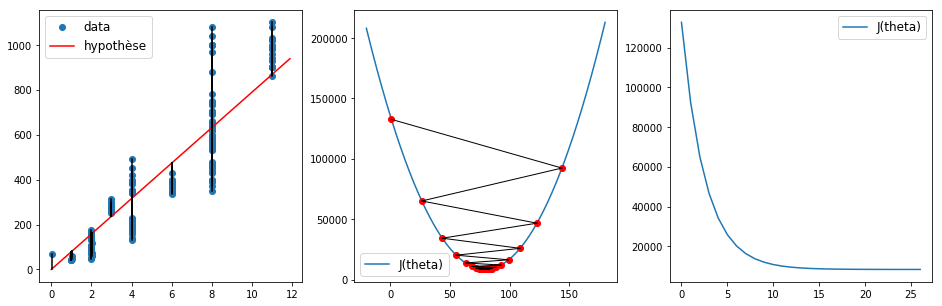

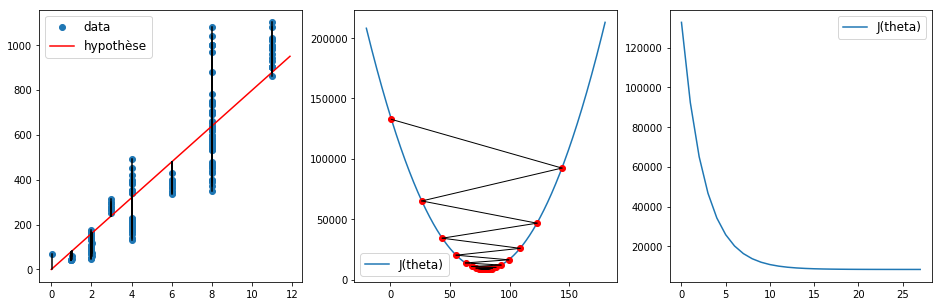

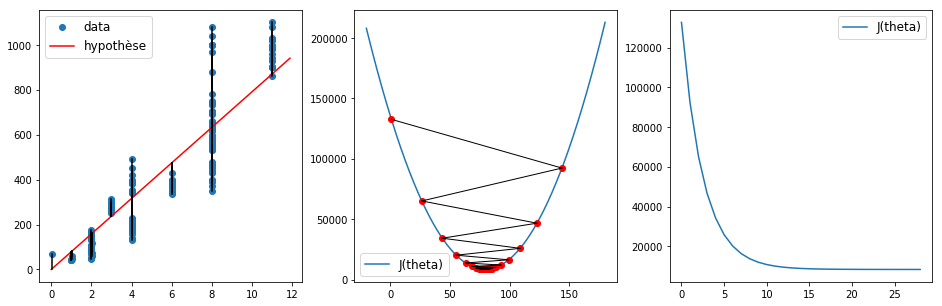

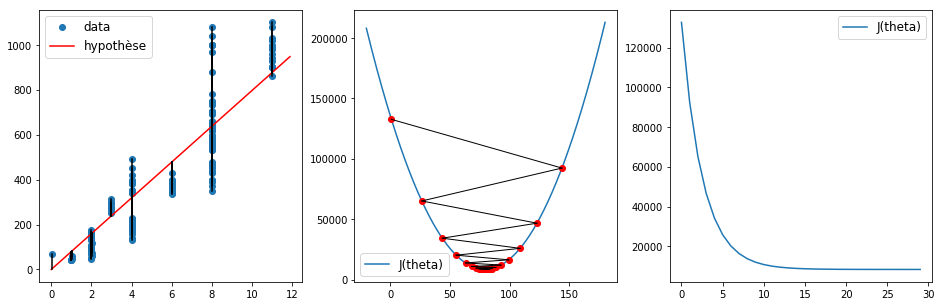

In [29]:
# On parametrise deux trois trucs

plt.rcParams['figure.figsize'] = [16, 5]
costFct = 0
count = 0
theta = thetaInit

# Et on se lance dans la boucle: La descente de gradient!
while np.abs(costFunction(Y_train,yhat) - costFct) >= epsilon*costFct:
    count += 1
    costFct = costFunction(Y_train,yhat)
    theta += gradDescent(X_train,Y_train,yhat,alpha)
    yhat = hypothesis(X_train,theta)
    gradDescentEvol = gradDescentEvol.append(pd.DataFrame({'theta':theta,
                                                           'J':costFunction(Y_train,yhat)},
                                                          index = np.arange(1)),
                                             ignore_index=True)
    fig, ax = plt.subplots(ncols=3)
    plotData(ax[0],X_train,Y_train,theta,yhat,gradDescentEvol)
    plotCostFunction(ax[1],X_train,Y_train,theta,gradDescentEvol,thetaInit)
    plotCostFunctionEvol(ax[2],gradDescentEvol)
    display.clear_output(wait=True)
    display.display(plt.gcf())
    time.sleep(1)

# 6) Conclusion

In [30]:
def errorFct(y,yhat):
    return np.abs(yhat - y).sum()/(y.shape[0])

In [31]:
# Afficher les résultats:
print('La descente de gradient a été réalisé en %i étapes.' % count)
print('theta = %f' % theta)
print("\nTrain set:")
print('J(theta) = %f' % costFunction(Y_train,hypothesis(X_train,theta)))
print('Error = %f' % errorFct(Y_train, hypothesis(X_train,theta)))
print("\nTest set:")
print('J(theta) = %f' % costFunction(Y_test,hypothesis(X_test,theta)))
print('Error = %f' % errorFct(Y_test, hypothesis(X_test,theta)))

La descente de gradient a été réalisé en 29 étapes.
theta = 79.609659

Train set:
J(theta) = 8330.520503
Error = 99.861108

Test set:
J(theta) = 7695.419661
Error = 89.299545


Notre nouvelle carte de 5 Go de GPU pourra se vendre autour de 398.05 €
Notre nouvelle carte de 10 Go de GPU pourra se vendre autour de 796.10 €
Notre nouvelle carte de 14 Go de GPU pourra se vendre autour de 1114.54 €


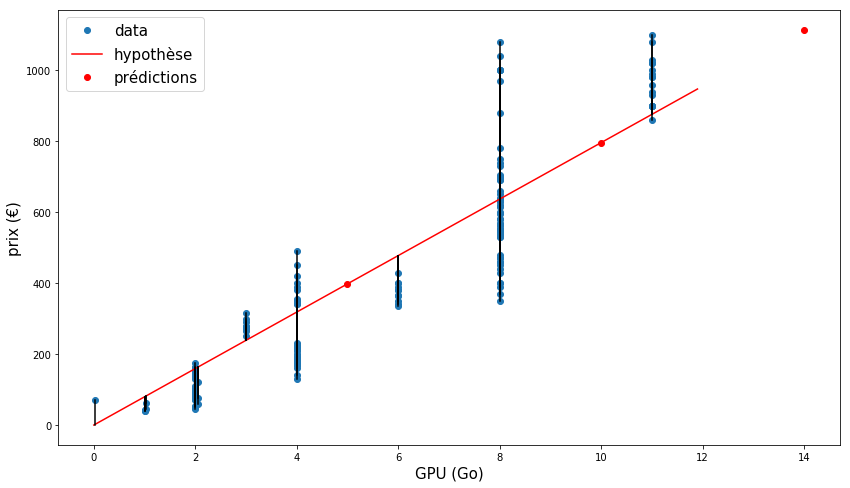

In [32]:
# Faisons une prédiction ....

newGPUs = [5,10,14]
for newGPU in newGPUs:
    print("Notre nouvelle carte de %i Go de GPU pourra se vendre autour de %.2f €" % 
          (newGPU,newGPU*theta))
    
plt.rcParams['figure.figsize'] = [14, 8]
plt.plot(X_train,Y_train,'o',label='data')
plt.plot(getHypothesisForPLot(theta).x,getHypothesisForPLot(theta).y,'r',label='hypothèse')
for i in range(X_train.shape[0]):
    plt.plot((X_train[i],X_train[i]), (min(Y_train[i],yhat[i]),max(Y_train[i],yhat[i])), 'k-')
plt.plot(newGPUs,[newGPU*theta for newGPU in newGPUs], 'or', label='prédictions')
plt.xlabel('GPU (Go)',fontsize=15)
plt.ylabel('prix (€)',fontsize=15)
plt.legend(fontsize=15)
plt.show();